# Tutorial: Decision boundaries in classification

*Disclaimer*: Code for ploting decision functions/boundaries is taken from [A. Géron's notebooks](https://github.com/ageron/handson-ml2) for his book ["Hands-on machine learning with Scikit-learn, Keras & Tensorflow"](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).



In [74]:
# import the necessary libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np


## Loading data: Iris dataset

We are going to use the clasical Iris dataset for this tutorial. However we'll use at most 2 features in order to allow 2D visualisation of the decision boundaries.

This classic benchmark can be easily loadad from scikit-learn:

In [75]:
from sklearn import datasets

iris = datasets.load_iris()

In [76]:
# Uncomment to see more info on the data structure
# list(iris.keys())

In [77]:
# Uncomment to see more info on the dataset
# print(iris.DESCR)

## Binary logistic regression
In this first example we use a single feature from the dataset (petal width) to train a binary classifier for _Iris virignica_.

In [78]:
X_bin = iris["data"][:, 3:]  # petal width
y_bin = (iris["target"] == 2)  # 1 if Iris virginica, else 0

Now let's fit a `LogisticRegression` with default parameters:

In [79]:
from sklearn.linear_model import LogisticRegression
bin_log_reg = LogisticRegression(random_state=42)
bin_log_reg.fit(X_bin, y_bin)

LogisticRegression(random_state=42)

The following code plots the decision function for positive (_I. virginica_) and negative classifications (not _I. virginica_). Both are logistic functions, complementary since both classes are mutually exclusive and are the only possible outcomes. Note that the sigmoids cross at a probability of 0.5. Orthogonaly projecting this point onto x-axis defines a straight line that marks the **decision boundary** between both classes. Beyond Petal widht = 1.66, _I. viriginica_ is more likely. Bellow this threshold, not _I. virignica_ is more likely.

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\matplotlib\patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


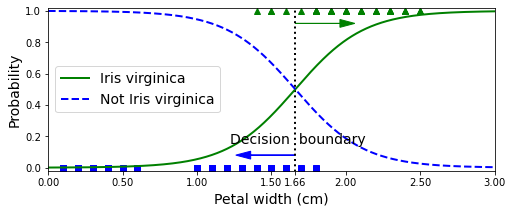

In [80]:
# getting predicted probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = bin_log_reg.predict_proba(X_new)

# computing the decision boundary position
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
# plotting the training data
plt.plot(X_bin[y_bin==0], y_bin[y_bin==0], "bs")
plt.plot(X_bin[y_bin==1], y_bin[y_bin==1], "g^")
# plotting decision boundary
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
# plotting the probability curves
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
# adding arrow annotations
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.xticks(np.concatenate((plt.xticks()[0],decision_boundary)))
plt.show()

## Multi-class classification with multinomial logistic regression

This time we will proceed with all three classes. We also add another feature, petal lenght, so this time we can visualize the decision boundaries in 2D.

In [81]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

Now we train the model with a regularization coefficient (L2 regularization):

In [82]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(
    multi_class="multinomial", C=10, random_state=42
)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

The decision boundary will be visualized thanks to a contour plot, generated by the function bellow.

In [83]:
def plot_decision_function(X, y, classifier, class_id=1):
    lim_x0 = 0, 8
    lim_x1 = 0, 4
    x0, x1 = np.meshgrid(
        np.linspace(*lim_x0, 500).reshape(-1, 1),
        np.linspace(*lim_x1, 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]


    y_proba = classifier.predict_proba(X_new)
    y_predict = classifier.predict(X_new)

    zz1 = y_proba[:, class_id].reshape(x0.shape)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

    from matplotlib.colors import ListedColormap

    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([*lim_x0, *lim_x1])
    plt.title(f"Decision function for iris {iris.target_names[class_id]}\n")

Let us look at first for the decision function for _I. versicolor_:

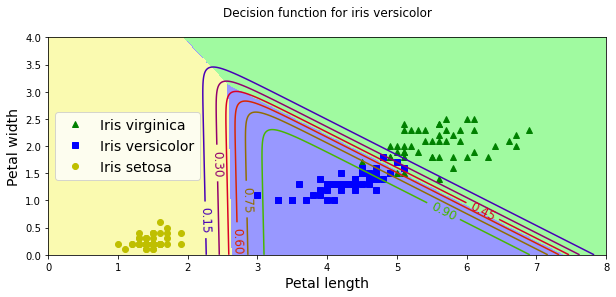

In [84]:
plot_decision_function(X, y, softmax_reg)

The color-zones represent the partitionning of the space into different classes that was learnt by multinomial logistic regression. The boundaries between each class (**again linear**) are defined by the line where both classes are equaly likely (i.e., 50% probability).

The level curves show the predicted probabilities for "iris versicolor". The green line corresponds to high probability, and blue to a low probability. Note how the probability decreases as we move from the blue region into the green/yellow regions.

You may change the parameter `class_id` in the `plot_decision_function` call if you wish the see the level curves for the other classes:

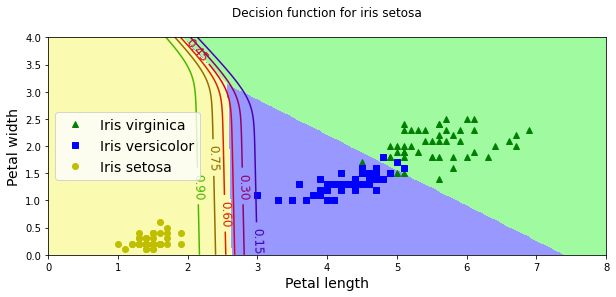

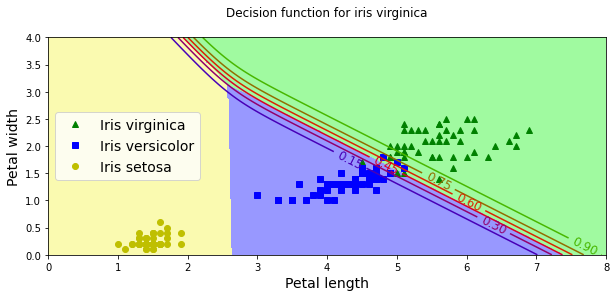

In [85]:
for i in [0,2]:
    plot_decision_function(X, y, softmax_reg, class_id=i)

## Alternative to multinomial: one-versus-rest logistic regression
When using the multinomial regression, we treat the multi-class problem by modeling all classes together.
Another approach to tackle multi-class classification is to learn a binary classifier for each class. For the final prediction, whichever classifiers predicts the highest probability "wins". This approach is known as **one-versus-all** or **one-versus-rest**.

You can implement this strategy by setting `multi_class="ovr"`.

In [86]:
log_reg = LogisticRegression(multi_class="ovr", C=10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10, multi_class='ovr', random_state=42)

Here we plot the decision functions for each of the 3 classes. Note how the learned decision boundaries are different (athough **still linear**), as well as the decision functions. 

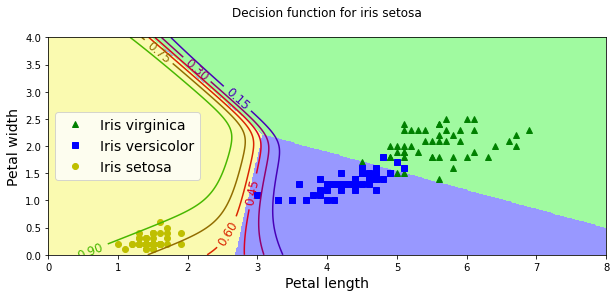

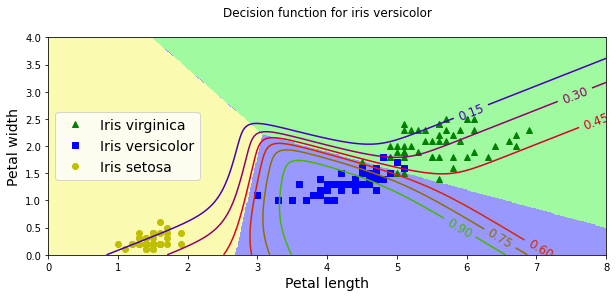

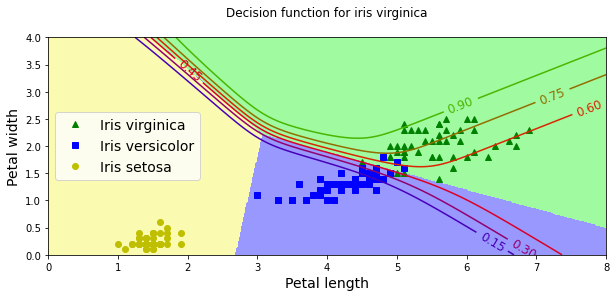

In [87]:
for c_id in range(3):
    plot_decision_function(X, y, log_reg, class_id=c_id)

## L2 Regularization and decision boundary
Regularization strenght affects the regresion weights and thus also the decision functions and boundaries.
If you check the documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on sklearn's documentation, you will see that:
- The regularization stenght can be set with the parameter `C`
- `C` is inversely related to the regularization strenght: regularization is more intense with low `C`. 
- In particular, a `C` value of 1 means equal weight between error cost and regularization penalty. 
- The default regularization used here is `L2`. It intends to limit the norm of the weight vectors (learned for logistic regression)



Let us visualize decision functions under different regularization strenghts.

**You can note that stronger regulalrization smoothes out the probability slope near the boundary (50% threshold).**
**On the contrary, a weak regularization favors sharper decisions.** 

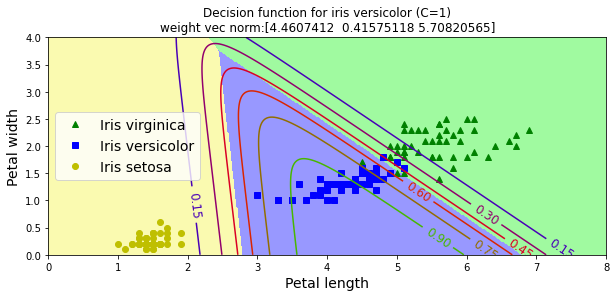

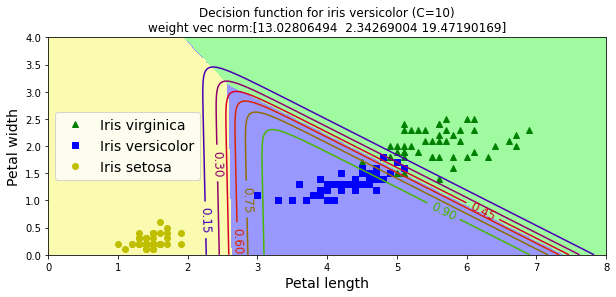

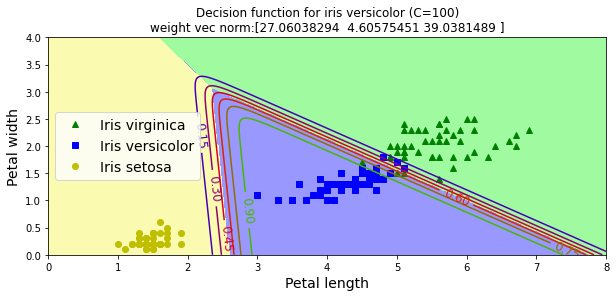

In [88]:
for C in [1, 10, 100]:
    softmax_reg.set_params(C=C)
    softmax_reg.fit(X, y)
    
    plot_decision_function(X, y, softmax_reg)
    
    # Adding information to the plot title
    ax = plt.gcf().gca()
    title = ax.get_title()
    ax.set_title(title.replace('\n',f" (C={C})\n"+ "weight vec norm:" + str((softmax_reg.coef_ ** 2).mean(axis=1))))

## Decision boundary for a decision tree

Now let's look at an entirely different model family: decision trees. 
First we train one decision tree, limiting it to a maximum of three leaf nodes:

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)
dtree.fit(X, y)


DecisionTreeClassifier(max_leaf_nodes=3, random_state=42)

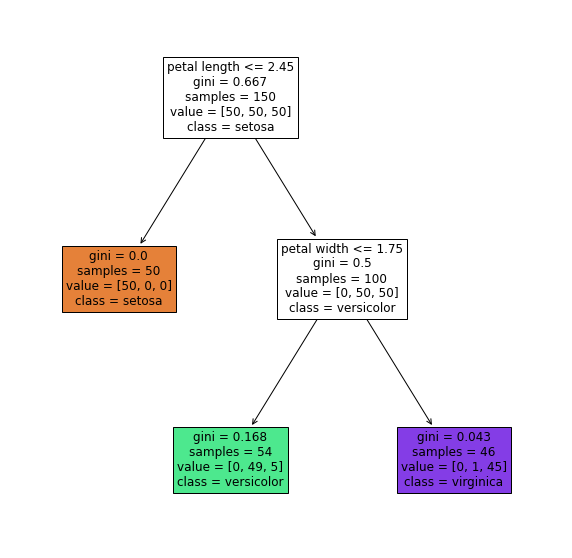

In [90]:
plot_tree(dtree,
          feature_names=["petal length",
                         "petal width"],
          class_names=iris.target_names,
          fontsize='large', filled=True)
plt.gcf().set_size_inches(10, 10)
plt.show()


Nodes in a tree orthogonally split the feature space in half, parallel to one axis. As a result all boundaries are formed by portions of orthogonal lines. We can verify this in the followng plots:

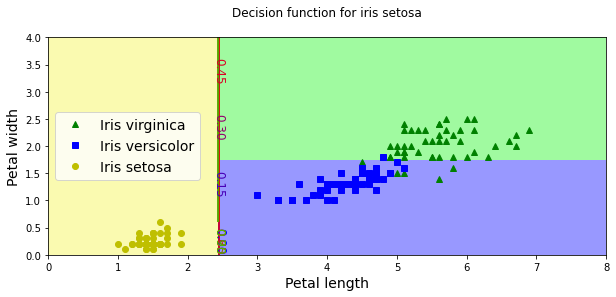

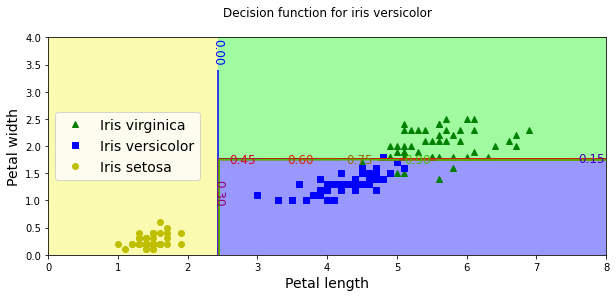

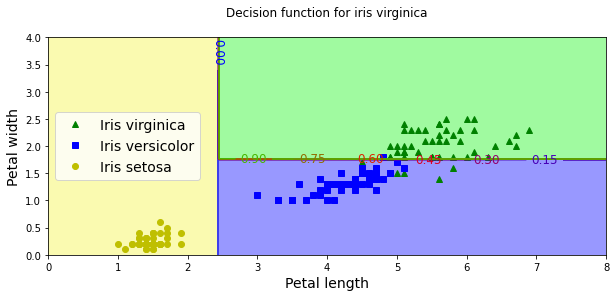

In [91]:
for i in range(3):
    plot_decision_function(X, y, dtree, class_id=i)


If we allow more leaf nodes, we may see portions of orthogonal lines combined to form a non-linear decision boundary.

In [92]:
dtree = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
dtree.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

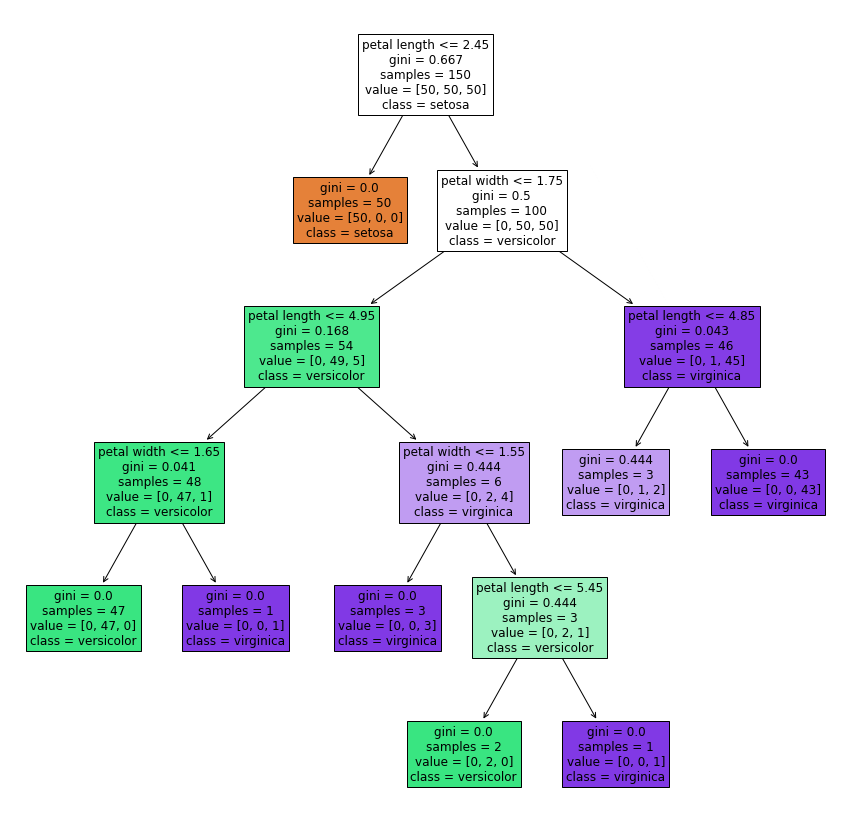

In [93]:
plot_tree(dtree,
          feature_names=["petal length",
                         "petal width"],
          class_names=iris.target_names,
          fontsize='large', filled=True)
plt.gcf().set_size_inches(15, 15)
plt.show()


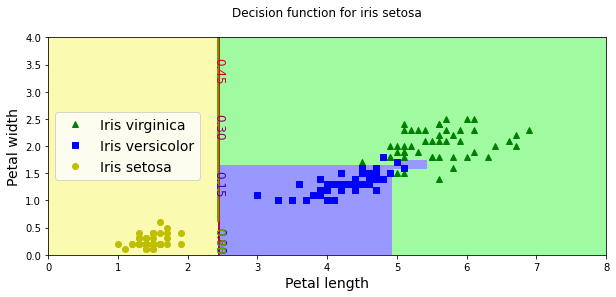

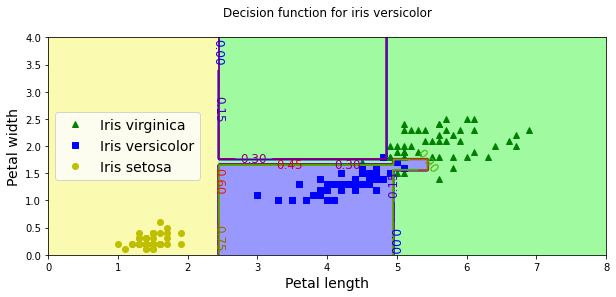

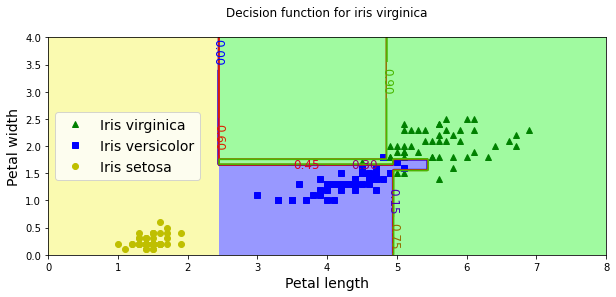

In [94]:
for i in range(3):
    plot_decision_function(X, y, dtree, class_id=i)